<a href="https://colab.research.google.com/github/epic-coder97/DATA-601-fall21-WAN/blob/main/Final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project
#### by Nikita Dharmadhikari

## Title: Youtube Video Analytics 

Kaggle: https://www.kaggle.com/donyoe/exploring-youtube-trending-statistics-eda/data


In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
#import wordcloud
import json


## Top youtube categories watched by people is 
- comedy
- music 
- Entertainment
- How to

## these are some things I found after doing a serach online. Lets see if this is correct or not?!

## Importing trending video data into a Dataframe
Countries : IN, US and CA


In [ ]:
df_us = pd.read_csv('US_youtube_trending_data.csv')
df_us['country'] ='US'

df_in = pd.read_csv('IN_youtube_trending_data.csv')
df_in['country'] ='IN'

df_ca = pd.read_csv('CA_youtube_trending_data.csv')
df_ca['country'] ='CA'



Appending data frames

In [ ]:
frames =[df_us, df_ca]
df = df_in.append(frames, ignore_index=True)

In [ ]:
df.shape


(285917, 17)

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,IN
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,IN
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,IN
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,IN
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,IN


### Droping columns which I am not going to use for this analysis

In [ ]:
df.drop('thumbnail_link', axis=1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,country
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,IN
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,IN
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,IN
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,IN
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285912,RmTJNtqpGVg,I bought every pullup bar in the world #shorts,2021-11-29T19:00:08Z,UCuJBpMyxlmemsQiivWPcGrQ,Browney Shorts,22,2021-12-06T00:00:00Z,[None],4502356,422391,3944,377,False,False,NaN,CA
285913,_vI_hOqbBVA,Solo Truck Camping in Sub-Freezing Weather,2021-12-02T01:15:36Z,UCL_BZpt0J9Kqwy6YPWr30ow,Mav,24,2021-12-06T00:00:00Z,solo camping|truck camping|winter camping|snow...,672111,29022,324,2672,False,False,https://mavmadeit.com/My Discord- https://disc...,CA
285914,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30T15:01:34Z,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-06T00:00:00Z,[None],4125037,275986,10536,31245,False,False,"The first 1,000 people to use this link will g...",CA
285915,Xw10-lGSUBE,"White Boy Speaks Jamaican Language, Shocks Jam...",2021-12-01T20:44:48Z,UCLNoXf8gq6vhwsrYp-l0J-Q,Xiaomanyc 小马在纽约,24,2021-12-06T00:00:00Z,xiaomanyc|new york|jamaica|jamaican language|j...,553844,26295,328,1896,False,False,Go to https://buyraycon.com/xiaomanyc and use ...,CA


In [ ]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            1
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          6739
country                 0
dtype: int64

### description has null values. Instead of removing those columns I will be putting empty strings in them

In [ ]:
df["description"] = df["description"].fillna(value="")

### Rechecking the count of Null values

In [ ]:
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         1
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
country              0
dtype: int64

### change datetime format of "trending_date" and "publishedAt"


In [ ]:
# change datetime format of "trending_date" and "publishedAt"
df['trending_date']=pd.to_datetime(df['trending_date'],format='%Y-%m-%dT%H:%M:%SZ')
df['publishedAt']=pd.to_datetime(df['publishedAt'],format='%Y-%m-%dT%H:%M:%SZ')

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,IN
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,IN
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,IN
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10 05:30:49,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,IN
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11 05:30:13,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,IN


In [ ]:
df['tags']

0         sadak|sadak 2|mahesh bhatt|vishesh films|pooja...
1                                                    [None]
2         clash diljit dosanjh|diljit dosanjh|diljit dos...
3         hindi songs|2020 hindi songs|2020 new songs|t-...
4         VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...
                                ...                        
285912                                               [None]
285913    solo camping|truck camping|winter camping|snow...
285914                                               [None]
285915    xiaomanyc|new york|jamaica|jamaican language|j...
285916    that’s my jam|jimmy fallon|nbc|ariana grande|k...
Name: tags, Length: 285917, dtype: object

### Replacing  '|' with a comma ',' 

In [ ]:
df['tags'] = df['tags'].apply(lambda x: x.replace('|',',').replace('"',""))
df['tags']

0         sadak,sadak 2,mahesh bhatt,vishesh films,pooja...
1                                                    [None]
2         clash diljit dosanjh,diljit dosanjh,diljit dos...
3         hindi songs,2020 hindi songs,2020 new songs,t-...
4         VYRL Original,Mohsin Khan,Shivangi Joshi,Payal...
                                ...                        
285912                                               [None]
285913    solo camping,truck camping,winter camping,snow...
285914                                               [None]
285915    xiaomanyc,new york,jamaica,jamaican language,j...
285916    that’s my jam,jimmy fallon,nbc,ariana grande,k...
Name: tags, Length: 285917, dtype: object

### Describtion of numerical columns

In [ ]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,285917.000000,2.859170e+05,2.859170e+05,2.859170e+05,2.859170e+05
mean,19.583225,2.845173e+06,1.519562e+05,4.164922e+03,1.312639e+04
std,6.627924,7.449662e+06,4.391469e+05,6.832636e+04,1.002110e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,4.816220e+05,1.848800e+04,3.890000e+02,1.140000e+03
50%,22.000000,1.046323e+06,4.872900e+04,9.640000e+02,3.028000e+03
75%,24.000000,2.444418e+06,1.281330e+05,2.648000e+03,8.046000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


cdf = df_us["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## Hypothesis 1: 
### Use of Capitalized words words attracts Viewers attention Which would help get more views.
#### Titles constitute an important part of each video. They describe the video for people before deciding to click on the video or not. And because of that, video title is one of the important factors in video success; video title plays an essential role in determining video click-through-rate (CTR). Here are some interesting facts about trending-videos titles.

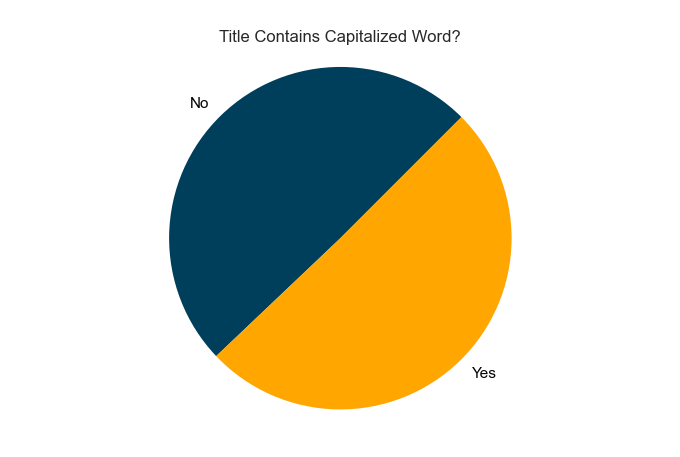

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)


True    0.50
False   0.50
Name: contains_capitalized, dtype: float64

### It looks like almost half of the titles don't use capitalized words. So the Hypothesis is wrong.

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'contains_capitalized'],
      dtype='object')

## Hypothesis 2 : Length of Video plays an important role in getting views.

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


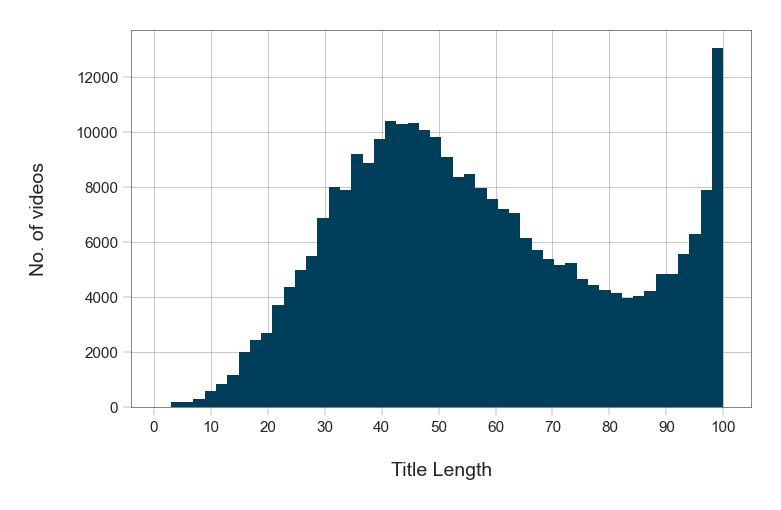

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that most videos have a title length of around 30-60 characters.But, there are also a lot of videos with title length of 100 characters. Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views:

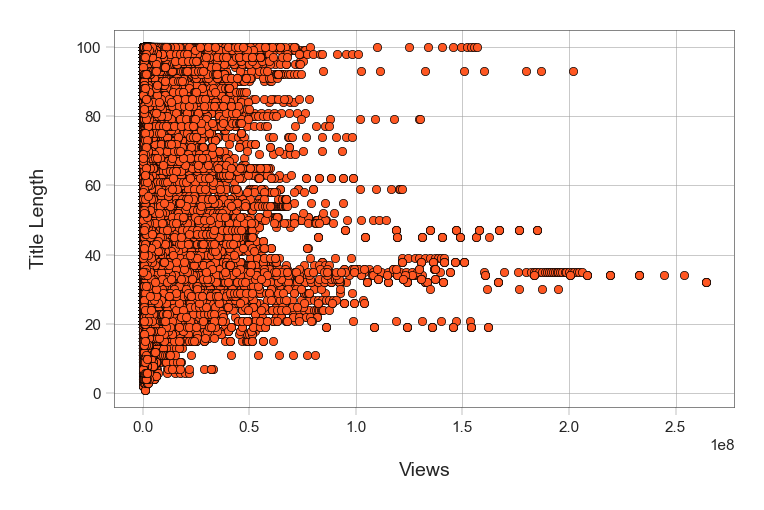

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 20 and 55 characters or so.

In [ ]:
df_us.sort_values(by='view_count',ascending=False).head(10)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,US
3358,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-28T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,232649205,15735533,714194,6065230,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,US
3137,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-27T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,219110491,15460822,674291,5810680,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,US
2894,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-26T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,208581468,15246496,646349,5744496,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,US
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-08T00:00:00Z,[None],206202284,6840430,240769,2826,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,US
73361,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-07T00:00:00Z,[None],204846218,6791654,237038,2792,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,US
73162,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-06T00:00:00Z,[None],203532581,6745231,233458,2765,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,US
72959,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-05T00:00:00Z,[None],202486840,6707446,230736,2744,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,US
72751,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-08-04T00:00:00Z,[None],201255646,6667435,227781,2713,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,US
2653,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-08-25T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,200692965,14994034,621578,5623570,https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,US


In [ ]:
# average number of viwes, likes, dislikes and comments
df_us[['view_count', 'likes', 'dislikes','comment_count']].agg('mean')

view_count      2798518.39
likes            152634.91
dislikes           3107.05
comment_count     13738.05
dtype: float64

## Analyzing Categories
We chose to begin to analyse the dataset by the category of the video with the hypothesis that different categories attract different viewers.

This implies that the best time to publish a video or the best words to use on the title of a video may radically differ depending on its category, which is reasonable. We do not have access to the users that have seen a video here, but if we did, we could do some sort of overlap measure, to check how many viewers in common videos from two categories have.

## Hypothesis 3 : Music videos get more views and likes.
### This hypothesis is based on the fact that my foryou page has more recomendation of music videos. Also, People in general love to listen to music in their free time.

In [ ]:
# Inserting categories names 
category_name = {1:'Film and Animation', 2:'Cars and Vehicles', 10: 'Music', 15:'Pets and Animals', 17:'Sport', 
19:'Travel and Events', 20:'Gaming', 22:'People and Blogs', 23:'Comedy', 24:'Entertainment', 25:'News and Politics',
26:'How to and Style', 27:'Education', 28:'Science and Technology', 29:'Non-profits and activism'}
df_us['category_name'] = df_us['categoryId'].map(category_name)

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


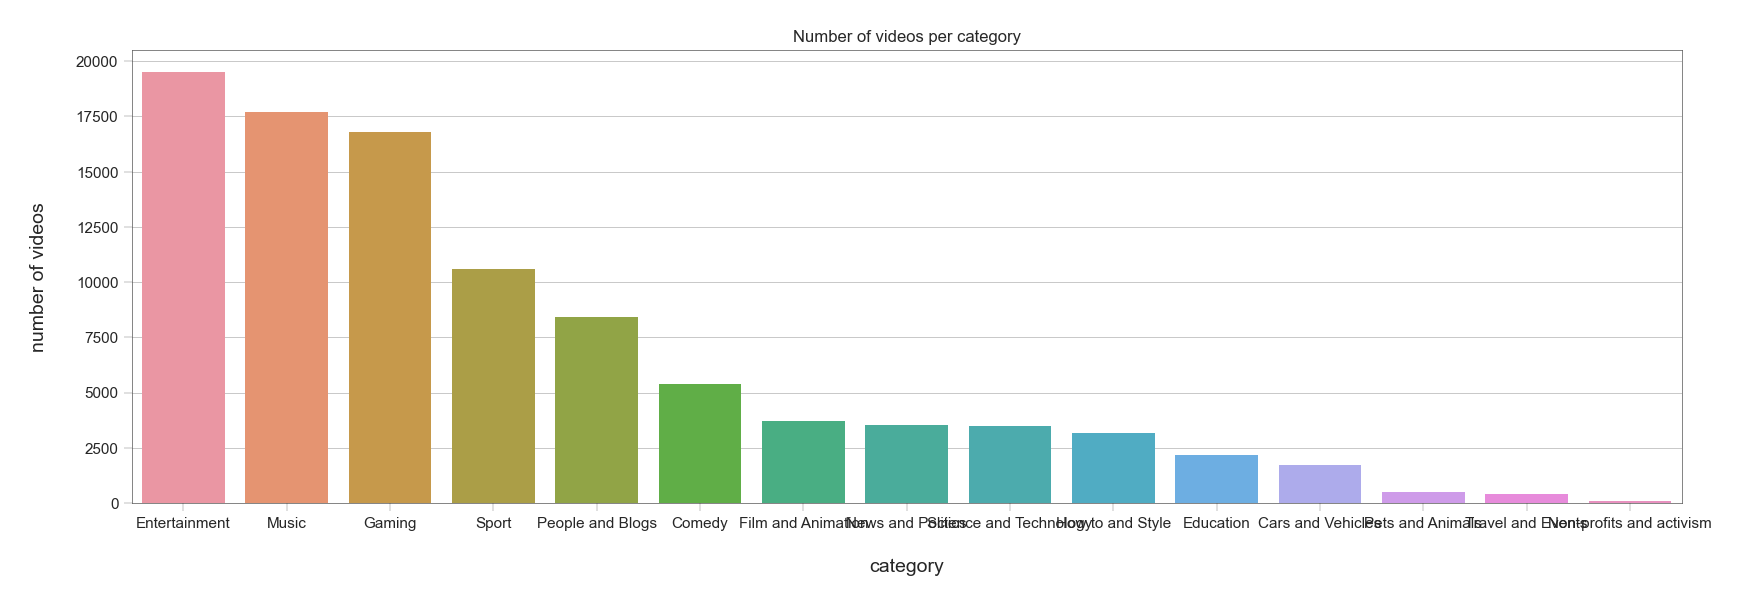

In [ ]:
nb_videos_per_category = df_us['category_name'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(nb_videos_per_category.index, nb_videos_per_category.values)
plt.title('Number of videos per category')
plt.xlabel('category')
plt.ylabel('number of videos')
plt.show()

### Looks like Entertainment Videos get more views followed by music videos.

In [ ]:
df_us.groupby('category_name')['likes'].sum()


category_name
Cars and Vehicles             87999209
Comedy                       706636826
Education                    203498328
Entertainment               3306841779
Film and Animation           368227453
Gaming                      2083371967
How to and Style             220968107
Music                       5674724660
News and Politics             79664131
Non-profits and activism      11096562
People and Blogs            1091019997
Pets and Animals              30929729
Science and Technology       403849489
Sport                        546916777
Travel and Events             18994531
Name: likes, dtype: int64

Of course the number of those features in themselves is not interesting, because it could easily be that categories with more videos have more likes, for example. it's more interesting to look at the number average number of likes each video in a category has.

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


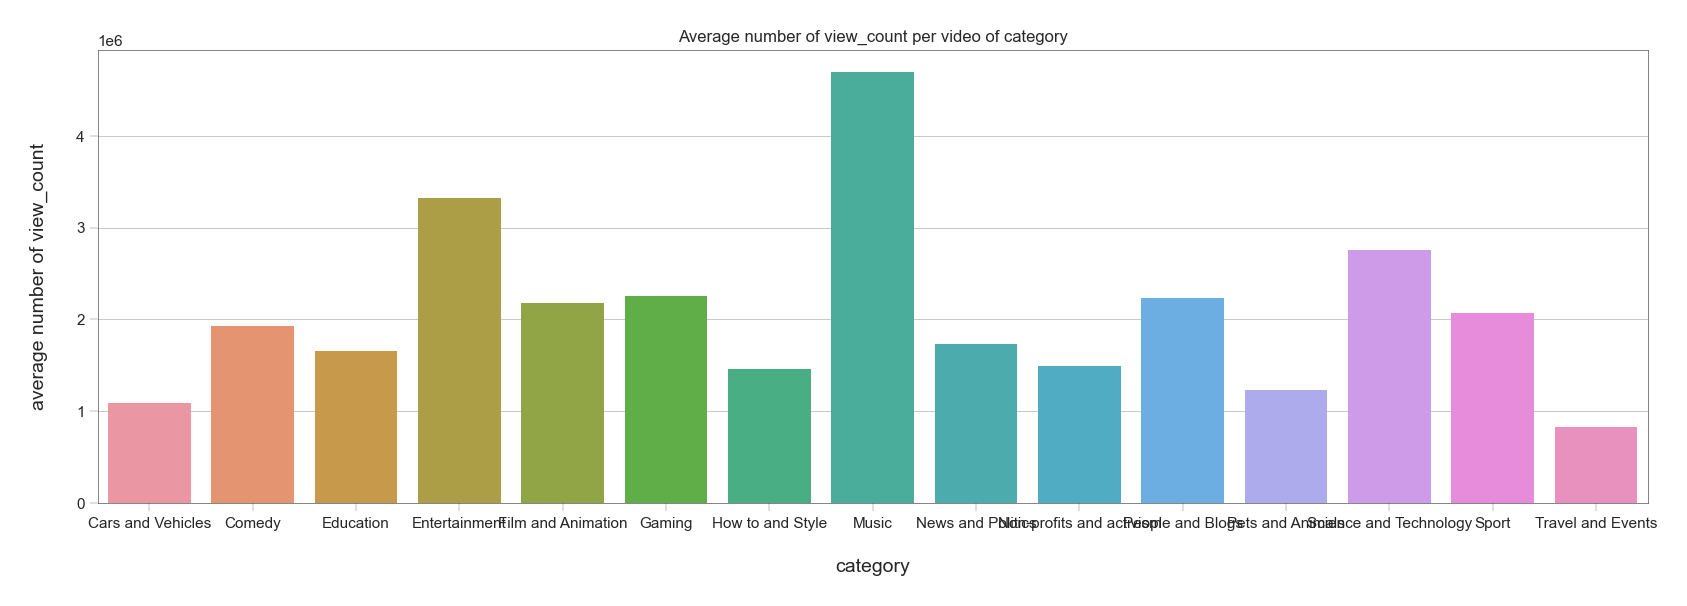

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


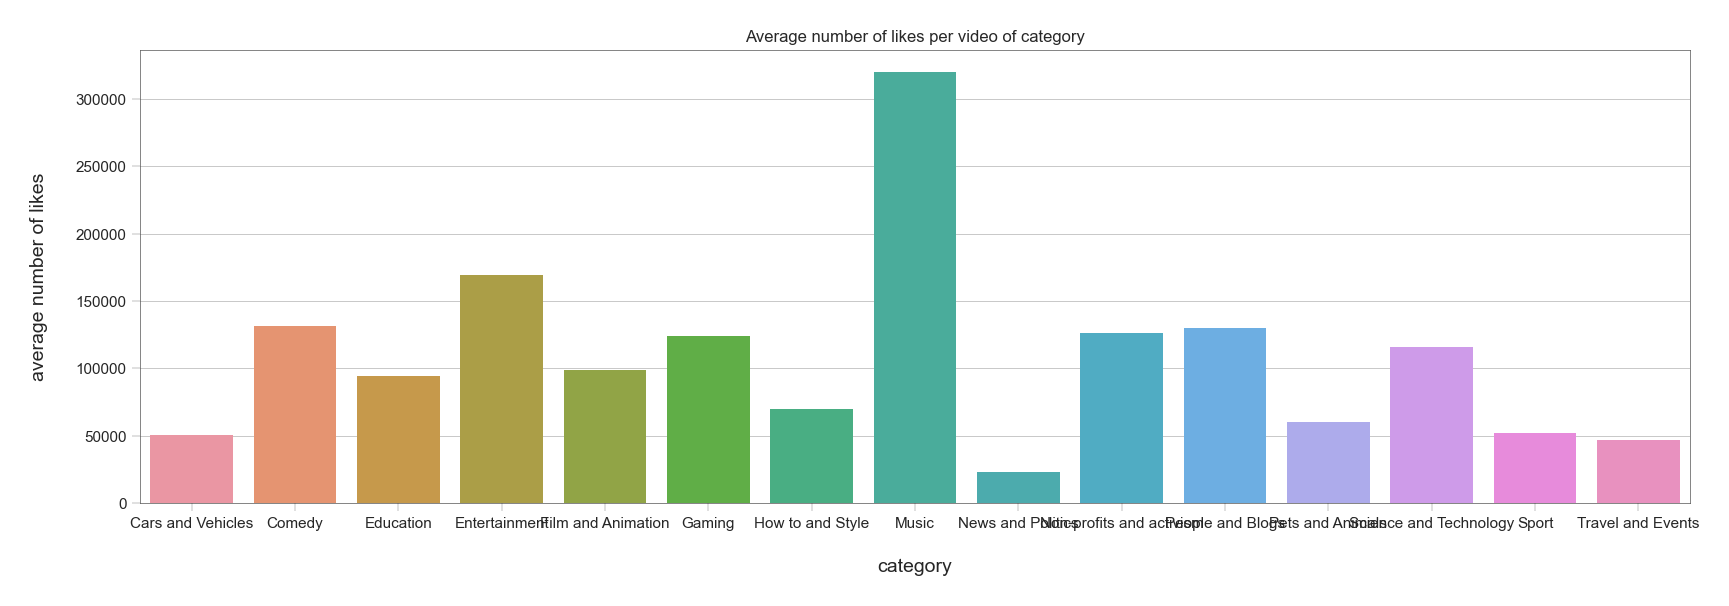

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


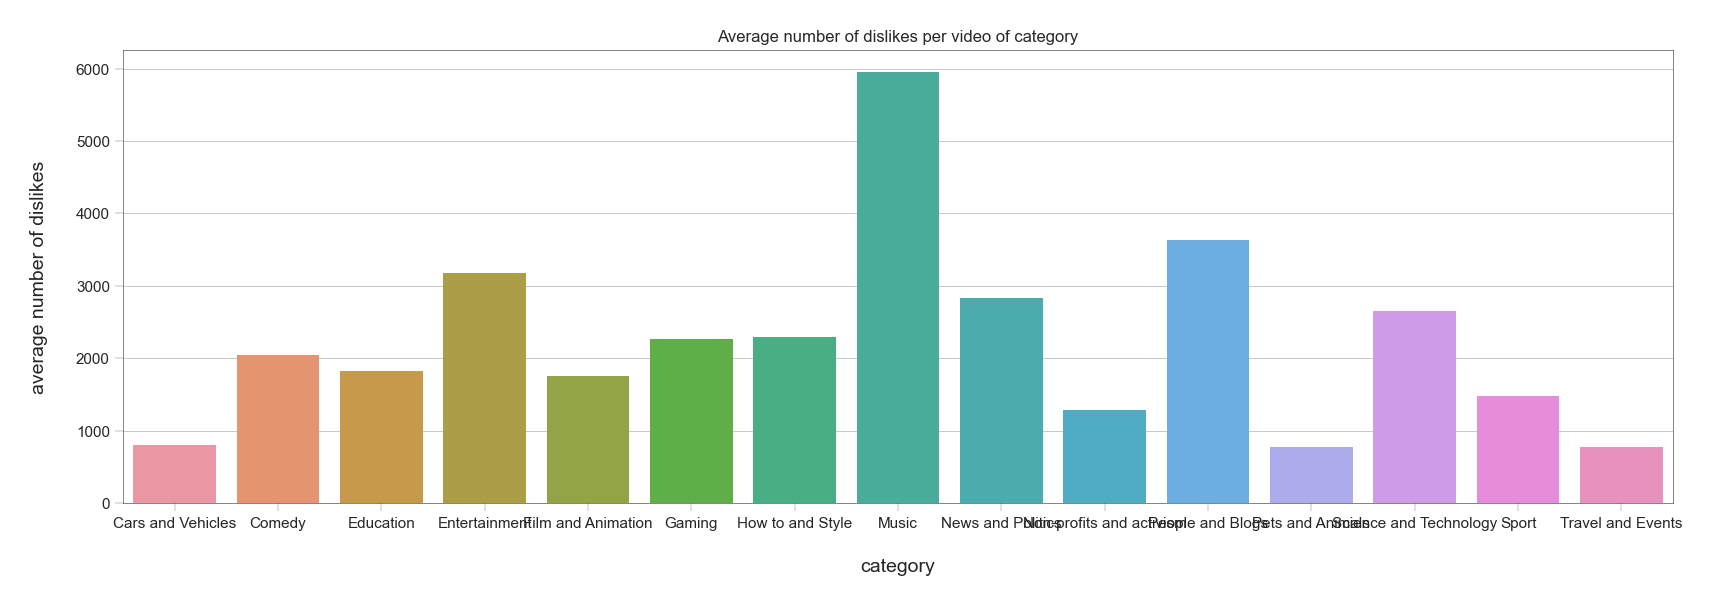

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


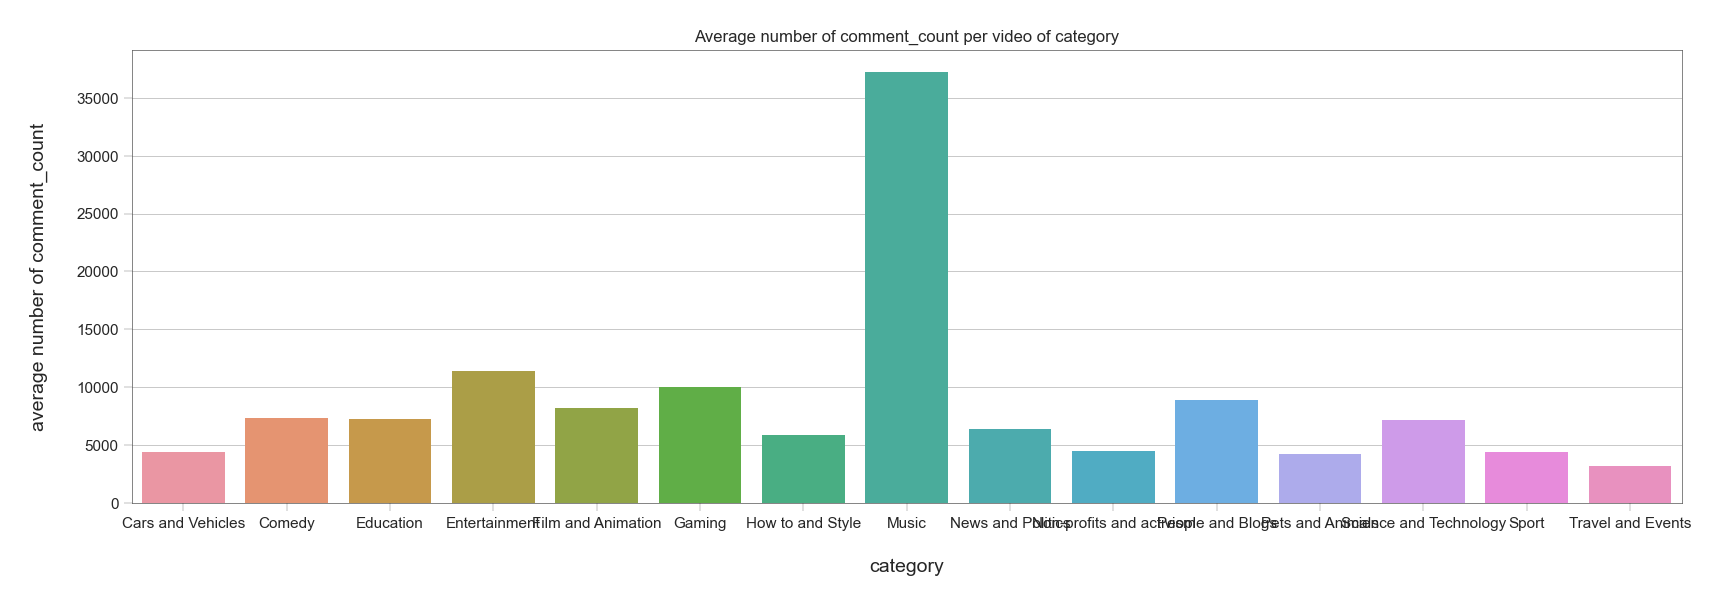

In [ ]:
features = ['view_count','likes', 'dislikes', 'comment_count']
for feat in features:
    avg_nb_per_category = df_us.groupby('category_name')[feat].sum().divide(nb_videos_per_category)
    plt.figure(figsize=(20,6))
    sns.barplot(avg_nb_per_category.index, avg_nb_per_category.values)
    plt.title(f'Average number of {feat} per video of category')
    plt.xlabel('category')
    plt.ylabel(f'average number of {feat}')
    plt.show()

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%fZ')


### Extracting month, day, year, hour and minute

In [ ]:
df['month'] = df['publishedAt'].dt.month
df['day'] = df['publishedAt'].dt.day
df['year'] = df['publishedAt'].dt.year
df['hour'] = df['publishedAt'].dt.hour
df['minute'] = df['publishedAt'].dt.minute


### checking to see if the columns are added 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285917 entries, 0 to 285916
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   video_id              285917 non-null  object        
 1   title                 285917 non-null  object        
 2   publishedAt           285917 non-null  datetime64[ns]
 3   channelId             285917 non-null  object        
 4   channelTitle          285916 non-null  object        
 5   categoryId            285917 non-null  int64         
 6   trending_date         285917 non-null  datetime64[ns]
 7   tags                  285917 non-null  object        
 8   view_count            285917 non-null  int64         
 9   likes                 285917 non-null  int64         
 10  dislikes              285917 non-null  int64         
 11  comment_count         285917 non-null  int64         
 12  thumbnail_link        285917 non-null  object        
 13 

### Hypothesis 4 : videos get the most views during the end of the year. 
As there are a lot of holidays and more videos are released during that time.

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


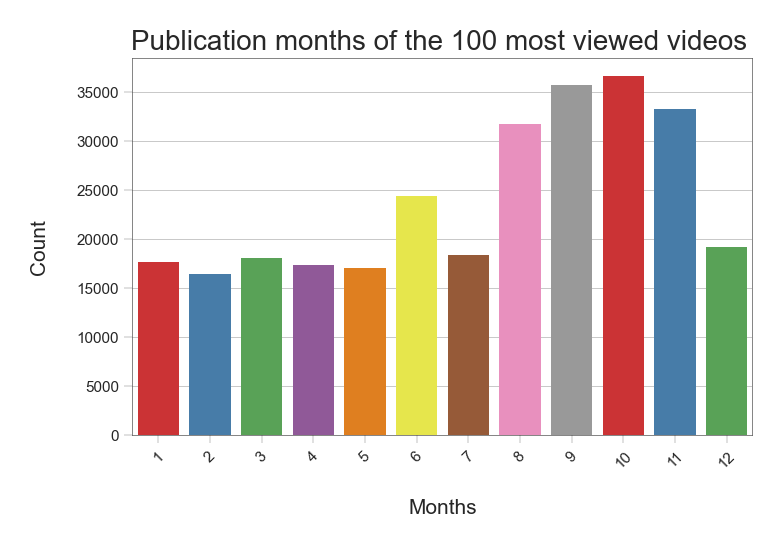

In [ ]:
g = sns.countplot('month', data=df.sort_values(by='view_count'), palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Publication months of the 100 most viewed videos ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

### Hypothesis 5 : Most trending videos are published during the afternoon time or in the evening.

c:\Users\Nikki\Dropbox\University\CW\601\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


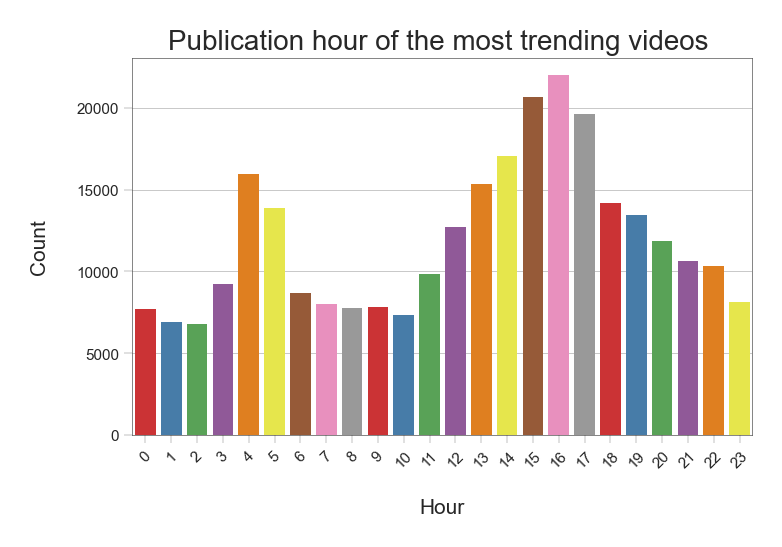

In [ ]:
g = sns.countplot('hour', data=df.sort_values(by='view_count'), palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Publication hour of the most trending videos ", fontsize=20)
g.set_xlabel("Hour", fontsize=15)
g.set_ylabel("Count", fontsize=15)
plt.show()

#### An explanation for this can be that when a video is publish one or two hours before the end of a work day, people will probably watch it right when they get home. When it's published at night time, people could have already other plans or videos to watch, and in the case of the morning, it could be that people are at work at the time and will just forget to watch the video when they get home, something more difficult to do when the notification it's still fresh in the memory.

## Q ) How many videos with disabled comments are there in the dataset

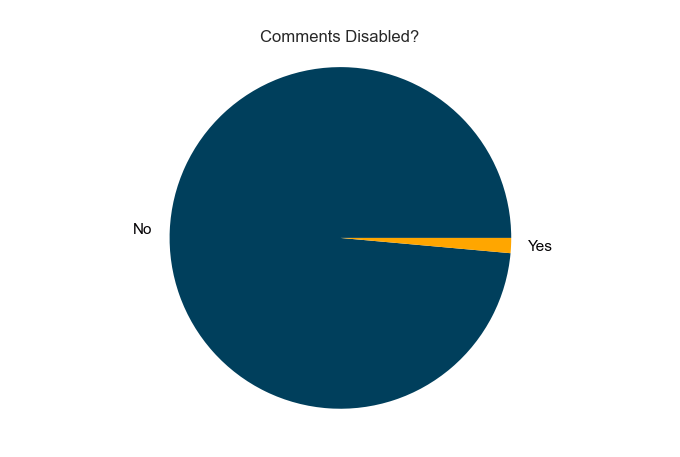

In [ ]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)


False   0.99
True    0.01
Name: comments_disabled, dtype: float64

## Q) How many trending videos have their ratings disabled?


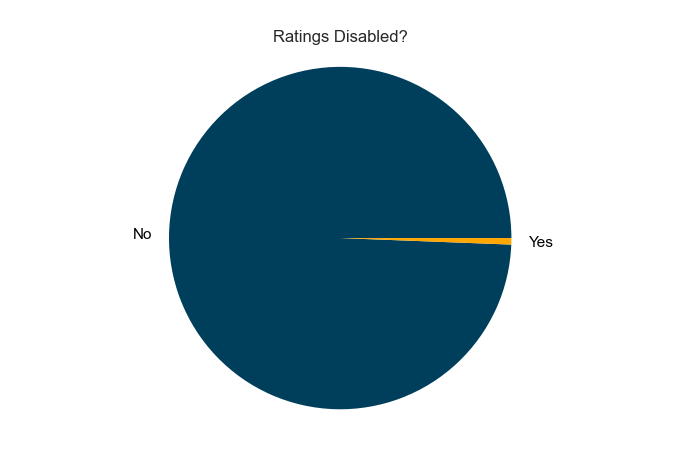

In [ ]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
df["ratings_disabled"].value_counts()


False    284182
True       1735
Name: ratings_disabled, dtype: int64

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'contains_capitalized',
       'title_length', 'month', 'day', 'year', 'hour', 'minute'],
      dtype='object')

## Hypothesis 6 : A video is on trending page for more than 1 week (on average)

In [ ]:
import numpy as np
from IPython.display import display

g_col = ['country','title', 'channelTitle', 'publishedAt']
trending_col = ['trending_date']
trend_date = df[g_col + trending_col]
trend_date['days_to_trend'] = (trend_date['trending_date'].dt.date - trend_date['publishedAt'].dt.date).dt.days
vid_time_trend = trend_date.groupby(g_col, as_index=False)[['days_to_trend']].max()
summ_df = pd.DataFrame()
for cnt in vid_time_trend.country.unique():
    data = vid_time_trend[vid_time_trend['country'] == cnt]
    summ = data.describe().T
    summ['country'] = cnt
    summ_df = pd.concat([summ_df,  summ])

summ_df.set_index('country', inplace=True)
display(summ_df)

C:\Users\Nikki\AppData\Local\Temp/ipykernel_20444/3446985802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_date['days_to_trend'] = (trend_date['trending_date'].dt.date - trend_date['publishedAt'].dt.date).dt.days


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
CA,19314.00,5.72,2.35,0.00,5.00,6.00,6.00,34.00
IN,27198.00,3.32,1.87,0.00,2.00,3.00,4.00,31.00
US,17724.00,6.01,1.96,0.00,5.00,6.00,7.00,37.00


,country,title,channelTitle,publishedAt,days_trending
61884,US,Turn into orbeez - Tutorial #Shorts,FFUNTV,2021-07-03 04:04:57,26
54636,US,Justin Bieber - Holy ft. Chance The Rapper,JustinBieberVEVO,2020-09-18 04:00:10,27
52522,US,Highlights: Manchester United 0-5 Liverpool | ...,Liverpool FC,2021-10-24 21:06:53,31
51939,US,Golden Buzzer: 9-Year-Old Victory Brinker Make...,America's Got Talent,2021-07-07 01:58:39,33
53977,US,"India claim stunning series win, end Australia...",cricket.com.au,2021-01-19 08:21:09,33


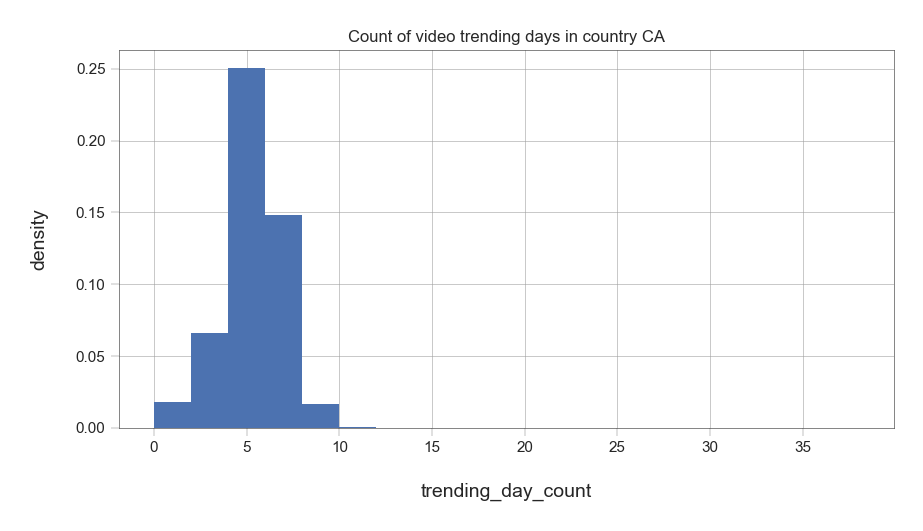

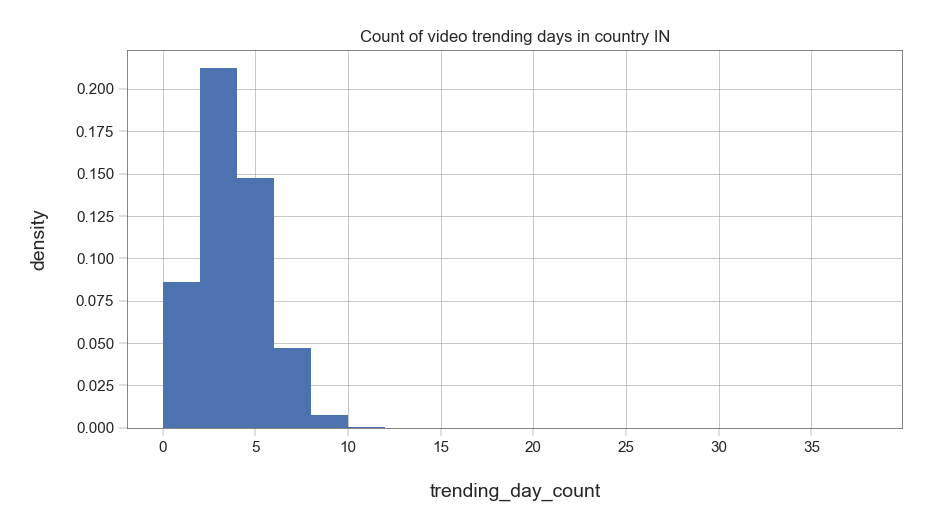

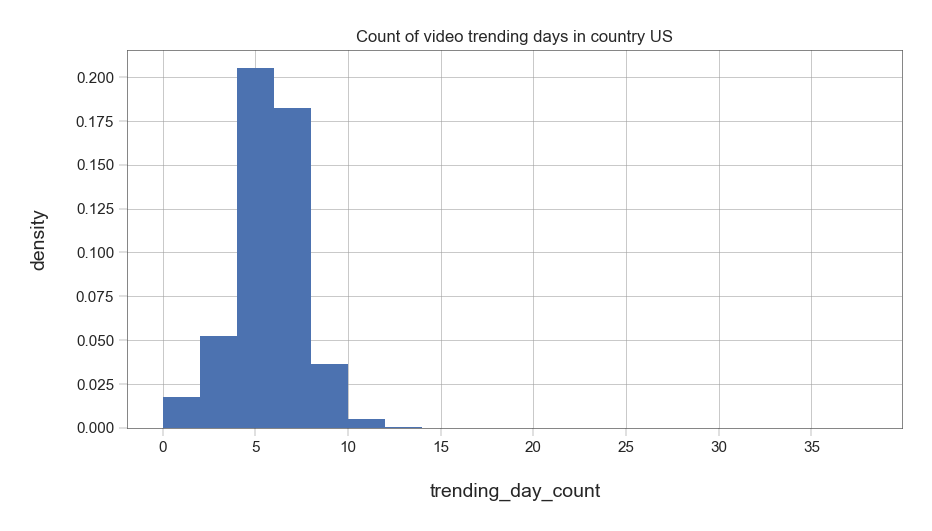

In [ ]:
vid_trend_count = trend_date.groupby(g_col, as_index=False)[['trending_date']].nunique()
vid_trend_count.columns = g_col + ['days_trending']
display(vid_trend_count.sort_values('days_trending').tail())

for cnt in vid_trend_count.country.unique():
    data = vid_trend_count[vid_trend_count['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Count of video trending days in country {}'.format(cnt))
    plt.hist(x='days_trending', data=data, density=True, bins=range(0, 40, 2))
    plt.xlabel('trending_day_count')
    plt.ylabel('density')
    plt.show()

In all countries a video is on trending page for a little less than 2 weeks.

## Hypothesis 7: It takes a video atleast 2 weeks to go back to trending page

,country,title,channelTitle,publishedAt,trending_diff
11306,CA,Måneskin - Zitti E Buoni - Italy 🇮🇹 - Grand Fi...,Eurovision Song Contest,2021-05-22 21:04:12,7.00
54171,US,Israeli Iron Dome filmed intercepting rockets ...,The Telegraph,2021-05-11 14:07:14,7.00
14137,CA,Sneaky Wife Got me #shorts Funny TikTok Prank ...,TikToMania,2021-05-16 07:30:00,7.00
37913,IN,School Picnic,Paayal Tena Short Videos,2021-11-12 12:11:25,7.00
60279,US,TIKTOKS that make you LOL,LazarBeam,2021-05-22 22:32:36,8.00


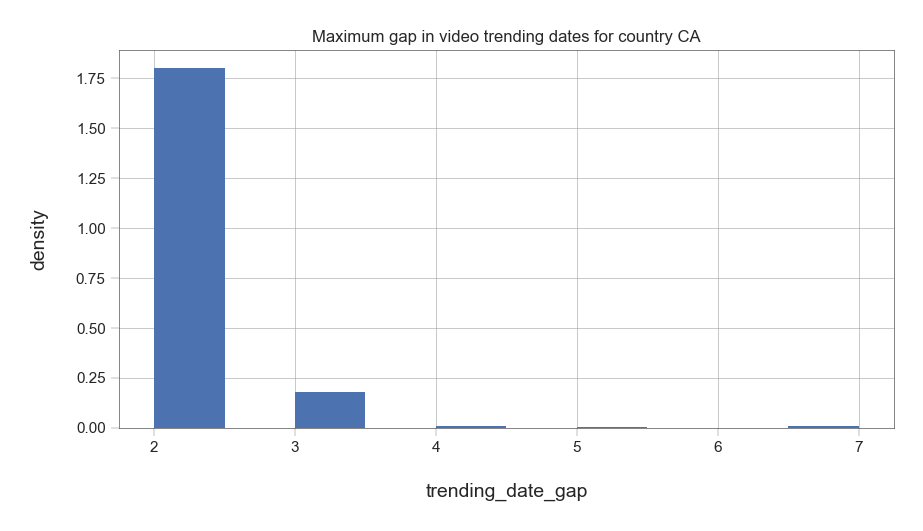

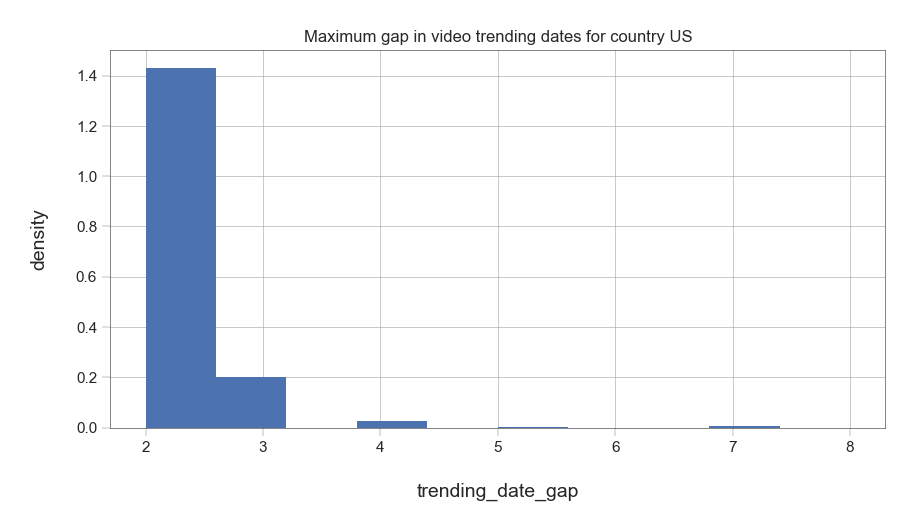

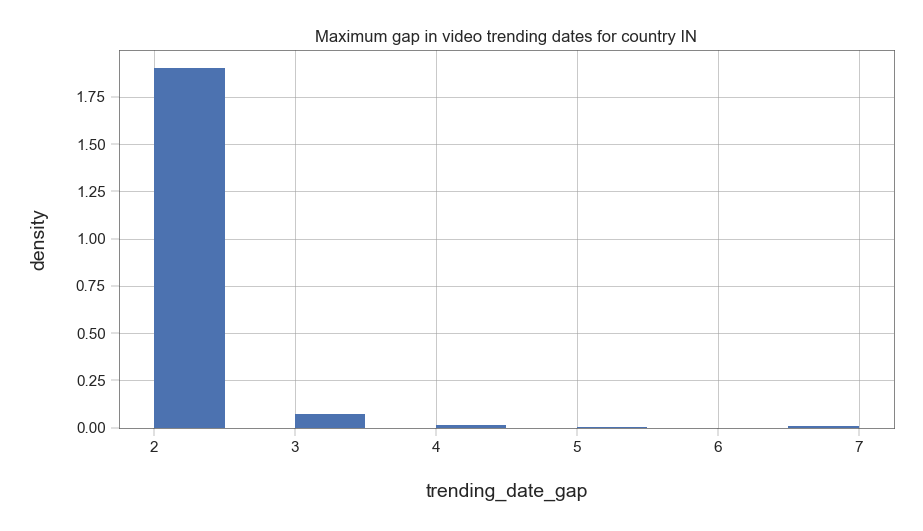

In [ ]:

g_col = ['country','title', 'channelTitle', 'publishedAt']
agg_col = ['trending_date']
sort = df.sort_values(g_col + agg_col)
shift_down = sort.groupby(g_col)[agg_col].shift()
sort['trending_diff'] = ((sort['trending_date'] - shift_down['trending_date']).dt.days).fillna(0)
max_diff = sort.groupby(g_col, as_index=False)[['trending_diff']].max()
max_diff = max_diff[max_diff['trending_diff'] > 1].sort_values('trending_diff')

display(max_diff.tail())

for cnt in max_diff.country.unique():
    data = max_diff[max_diff['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Maximum gap in video trending dates for country {}'.format(cnt))
    plt.hist(x='trending_diff', data=data, density=True)
    plt.xlabel('trending_date_gap')
    plt.ylabel('density')
    plt.show()

observation: form above we can see that a video has taken less than a week to become popular again.

### Hypothesis 8 : Channel native to the specific country will have the most views. For India it might be T-series.

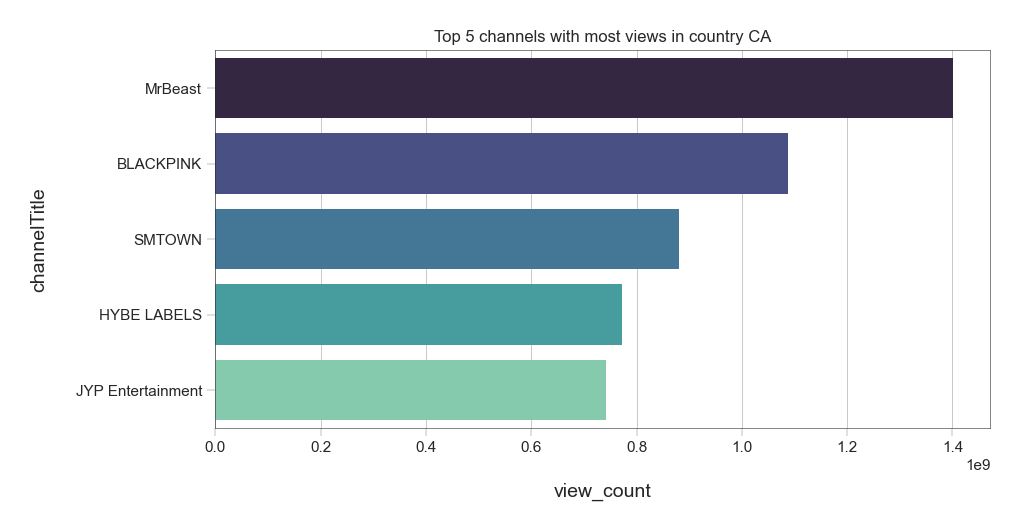

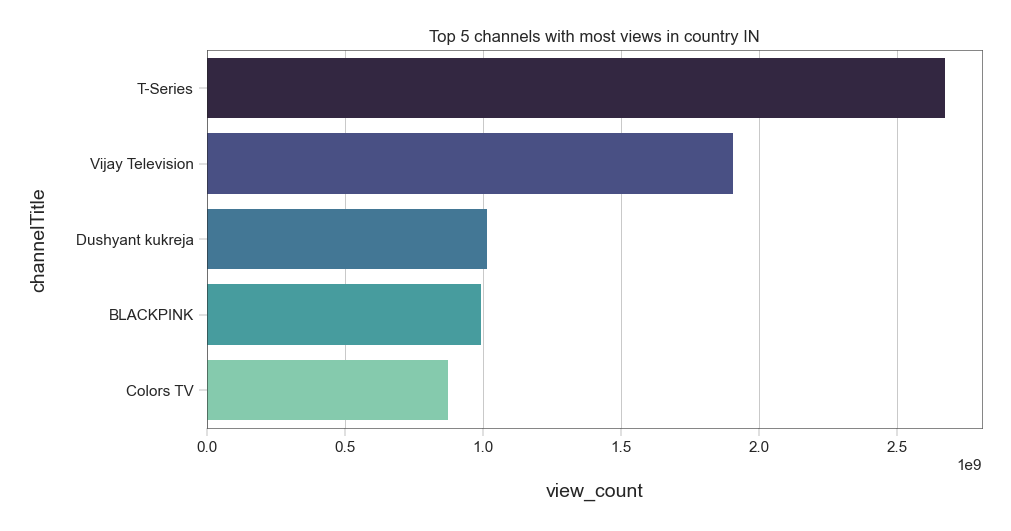

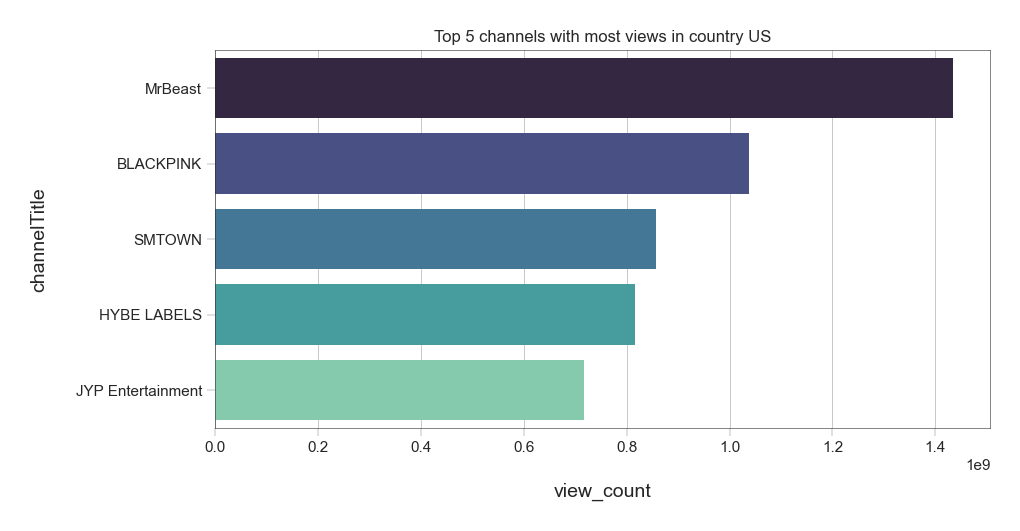

In [ ]:
g_col = ['country','channelTitle','title', 'publishedAt', 'trending_date']
agg_col = ['view_count']

pop_channel = df.sort_values(g_col).groupby(g_col[:-1], as_index=False)[agg_col].last()
channel_total = pop_channel.groupby(g_col[0:2], as_index=False)[agg_col].sum()
country_top = channel_total.groupby('country', as_index=False).apply(lambda x: x.sort_values(['view_count', 'channelTitle'], ascending=[False, True]).head(5))


for cnt in country_top.country.unique():
    data = country_top[country_top['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Top 5 channels with most views in country {}'.format(cnt))
    sns.barplot(y='channelTitle', x='view_count', data=data, palette='mako')
    plt.show()

Obeservation : Tseries is the most viewed channel in India. Mr.beast is the most viewed channel in other 2 countries. Surprisingly Piediepie has not made to the list.

## Hypothesis 9 : Tseries has the highest nuber of videos on trending page.
As tseries has the highest subscriber count and releases multiple videos a day they might have the highest number of videos on trending page.

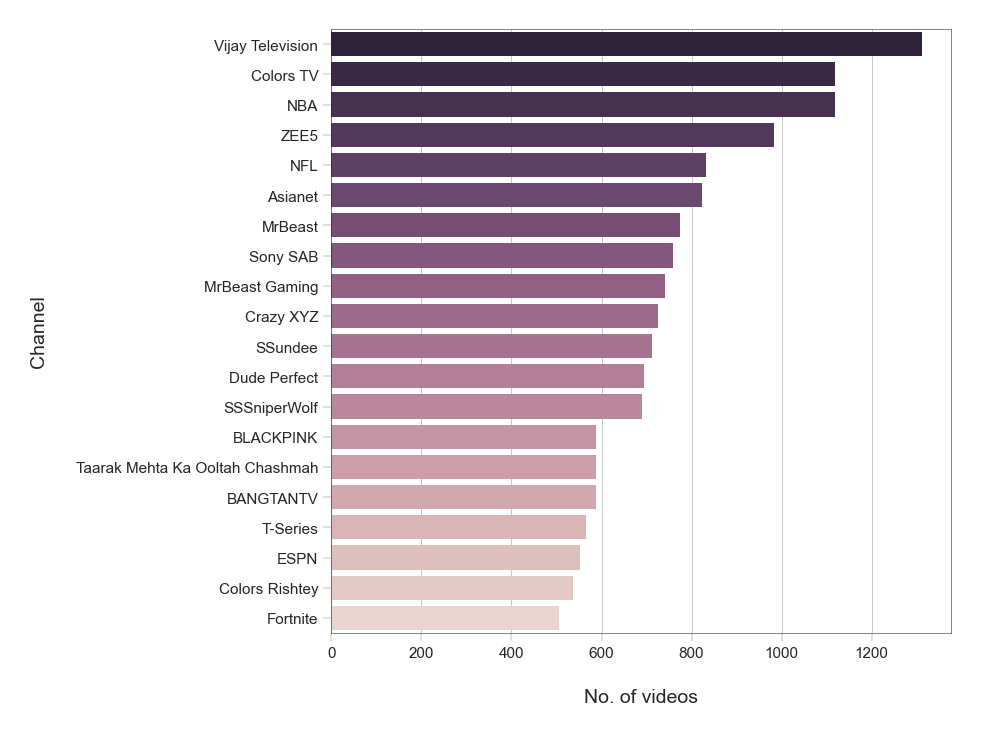

In [ ]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

Looks like my hypothesis is wrong. Vijay Television has the most videos on trending page. Also it should be noted that it falls under entertainment category.

In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'contains_capitalized',
       'title_length', 'month', 'day', 'year', 'hour', 'minute'],
      dtype='object')

## Hypothesis 10 : Views and Likes are strongly corelated

Now let’s see how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate, meaning that views and likes increase and decrease together:

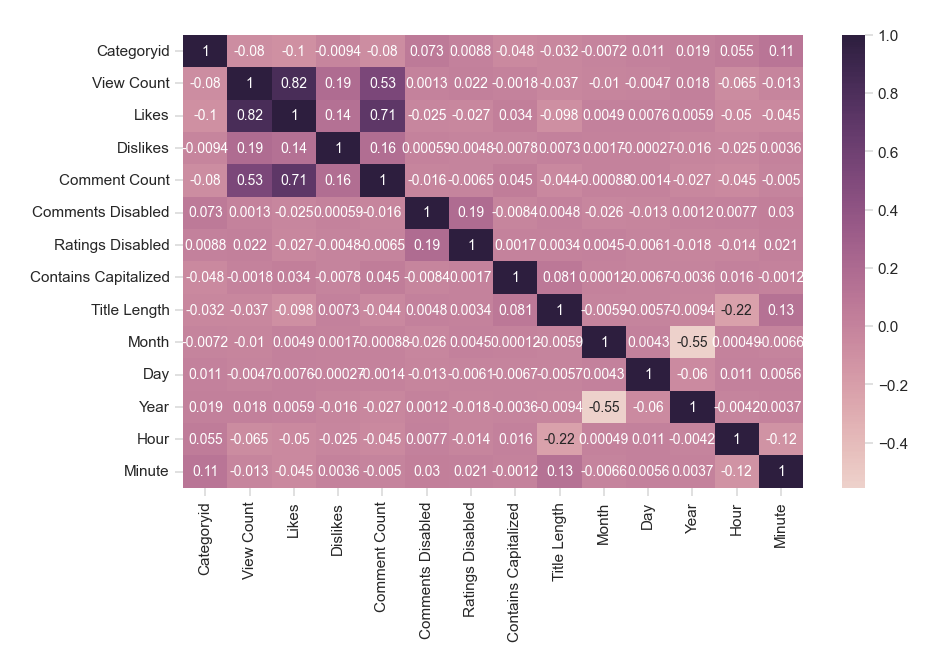

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


The correlation map and correlation table above indicate that views and likes are strongly positively correlated.